# 3. Solving Differential Equations with the Shooting Method
## A. The Angular Function

### Where we left off

We were left with the following equation to solve.

$$\frac{d }{d \eta}\left [ \left ( 1 - \eta^2 \right ) \frac{d S}{d \eta} \right ] + \left [ \Lambda -\frac{\mu^2}{1- \eta^2} -c^2\eta^2 \right ]S = 0$$

For reasons not necessary for our discussion (see Grivet for full explanation), the function $S(\eta)$ can be expressed with another function $f(\eta)$ in the following way. As we will see, it is $f(\eta)$ that will be solved numerically, and then and only then is $S(\eta)$ obtained.

$$S(\eta) = \left ( 1 - \eta^2 \right )^{\mu/2} f(\eta)$$

Substitution yields

$$\left ( 1 - \eta^2 \right ){f}'' -2\left ( \mu+1 \right )\eta{f}'-\left [ \mu\left (\mu+1  \right ) -\Lambda +c^2\eta^2 \right ]f=0$$

### Conditions on the function $f(\eta)$

Before we proceed with solving $f(\eta)$, we first look at the properties of $S(\eta)$ that will help us with $f(\eta)$. Two cases are possible with $S(\eta)$; it being symmetric (even function) (for example, $1\sigma_g \, / \, \sigma_{g1s}$) or it being antisymmetric (odd function) (for example, $1\sigma_u^* \, / \, \sigma_{u1s}^*$). This symmetry is inherited to $f(\eta)$ (as $\left ( 1 - \eta^2 \right )^{\mu/2}$ is an even function). We will exploit this symmetry by solving $f(\eta)$ for $0 \leq \eta \leq 1$ and then filling in the value of $f$ for $-1 \leq \eta \leq 0$ according to the desired symmetry.

We now tackle the initial values required to solve this differential equation. We arbitrarily choose $f(1)=1$ for convenience (TODO: explain?), and as this differential equation is a second-order ODE, we must first obtain the value of $f'(1)$. This can be obtained from the limiting form of the equation above when $\eta \to 1-$. 

$$f'(1) = \frac{\mu\left ( \mu+1 \right ) + c^2 - \Lambda}{2\left ( \mu+1 \right )}$$

We require that $f(\eta)$ to be a nice function; $f$ and $f'$ must be continuous at $-1 \leq \eta \leq 1$. Our area of interest is at $\eta = 0$. 

For the symmetric case ($f$ is even), 

$
\begin{align}
\quad \lim_{\eta \to 0-}f'(\eta) = \lim_{\eta \to 0+}f'(\eta) \text{ and } f'(-\eta) = - f'(\eta)
\end{align}
$

$
\begin{align}
\quad \therefore f'(0) = 0
\end{align}
$

For the antisymmetric case ($f$ is odd), 

$
\begin{align}
\quad \lim_{\eta \to 0-}f(\eta) = \lim_{\eta \to 0+}f(\eta) \text{ and } f(-\eta) = - f(\eta)
\end{align}
$

$
\begin{align}
\quad \therefore f(0) = 0
\end{align}
$

These are the constraints on the function $f(\eta)$

#### To summarize

For the symmetric case:

- $f(1) = 0$ and $f'(1) = \left [ \mu\left ( \mu+1 \right ) + c^2 - \Lambda \right ]/\left [ 2 \left ( \mu+1 \right ) \right ]$, which is dependent on $c^2$ and $\Lambda$
- Using a differential equation solver, we can numerically compute $f(\eta)$ in the domain of $0 \leq \eta \leq 1$, for any value of $c^2$ and $\Lambda$
- For select pairs of values of $c^2$ and $\Lambda$, $f'(0) = 0$. This $f(\eta)$ is the $f(\eta)$ we want.

The same applies to the antisymmetric case, except $f(0) = 0$ in the place of  $f'(0) = 0$.

### The shooting method for $f(\eta)$

It is time to realize this idea. For this example, we set $\mu=0$. Our goal is to find the appropriate value of $\Lambda$ for a fixed value of $c^2 = -4.0$ (`c2` in the code below), to obtain a pair of values for $c^2$ and $\Lambda$ that satisfies $f'(0) = 0$ (symmetric) or $f(0) = 0$ (antisymmetric). 

For the symmetric case, let our first guess at $\Lambda$ be $\Lambda = -2.0$ (`lbda_val`). We will use `scipy.integrate.solve_ivp`, and below is a part of the documentation.

>This function numerically integrates a system of ordinary differential equations given an initial value:
>>```Python
>>dy / dt = f(t, y)
>>y(t0) = y0
>>```

We substitute  `t` and `y` with $\eta$ (`eta`) and `p` (a 1D numpy array containing $f(\eta)$ and $f(\eta)$). Lastly, we substitute `f(t, y)` with the function `F`, which returns a 1D numpy array containing $f'(\eta)$ and $f''(\eta)$.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "figure.figsize": [8.0, 5.0]})

# mu, c^2, and Lambda, as declared above
mu = 0
c2 = -4.0
lbda_val = -2.0
is_even=True

$$p = \begin{bmatrix} f(\eta)\\ {f}'(\eta) \end{bmatrix}, \qquad \text{initial} \, p \left (\text{at }\eta=1  \right ) = \begin{bmatrix} f(1)\\ {f}'(1) \end{bmatrix} = \begin{bmatrix} 1\\ \frac{\mu\left ( \mu+1 \right ) + c^2 - \Lambda}{2\left ( \mu+1 \right )} \end{bmatrix}$$

In [2]:
# initial value of p, at eta = 1
p1 = np.array([1, ((mu*(mu+1) + c2 - lbda_val)/(2*(mu+1)))])

$${f}'' = \frac{2\left ( \mu+1 \right )\eta{f}'+\left [ \mu\left (\mu+1  \right ) -\Lambda +c^2\eta^2 \right ]f}{1 - \eta^2}$$

$$F = \begin{bmatrix} f'(\eta)\\ f''(\eta) \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ \frac{2\left ( \mu+1 \right ) \eta}{ 1 - \eta^2 } & \frac{\mu\left ( \mu+1 \right ) - \Lambda +c^2\eta^2}{ 1 - \eta^2 }\end{bmatrix} \begin{bmatrix} f(\eta)\\ f'(\eta) \end{bmatrix}$$

Value of f'(0) for Lambda = -2.0: -0.41182


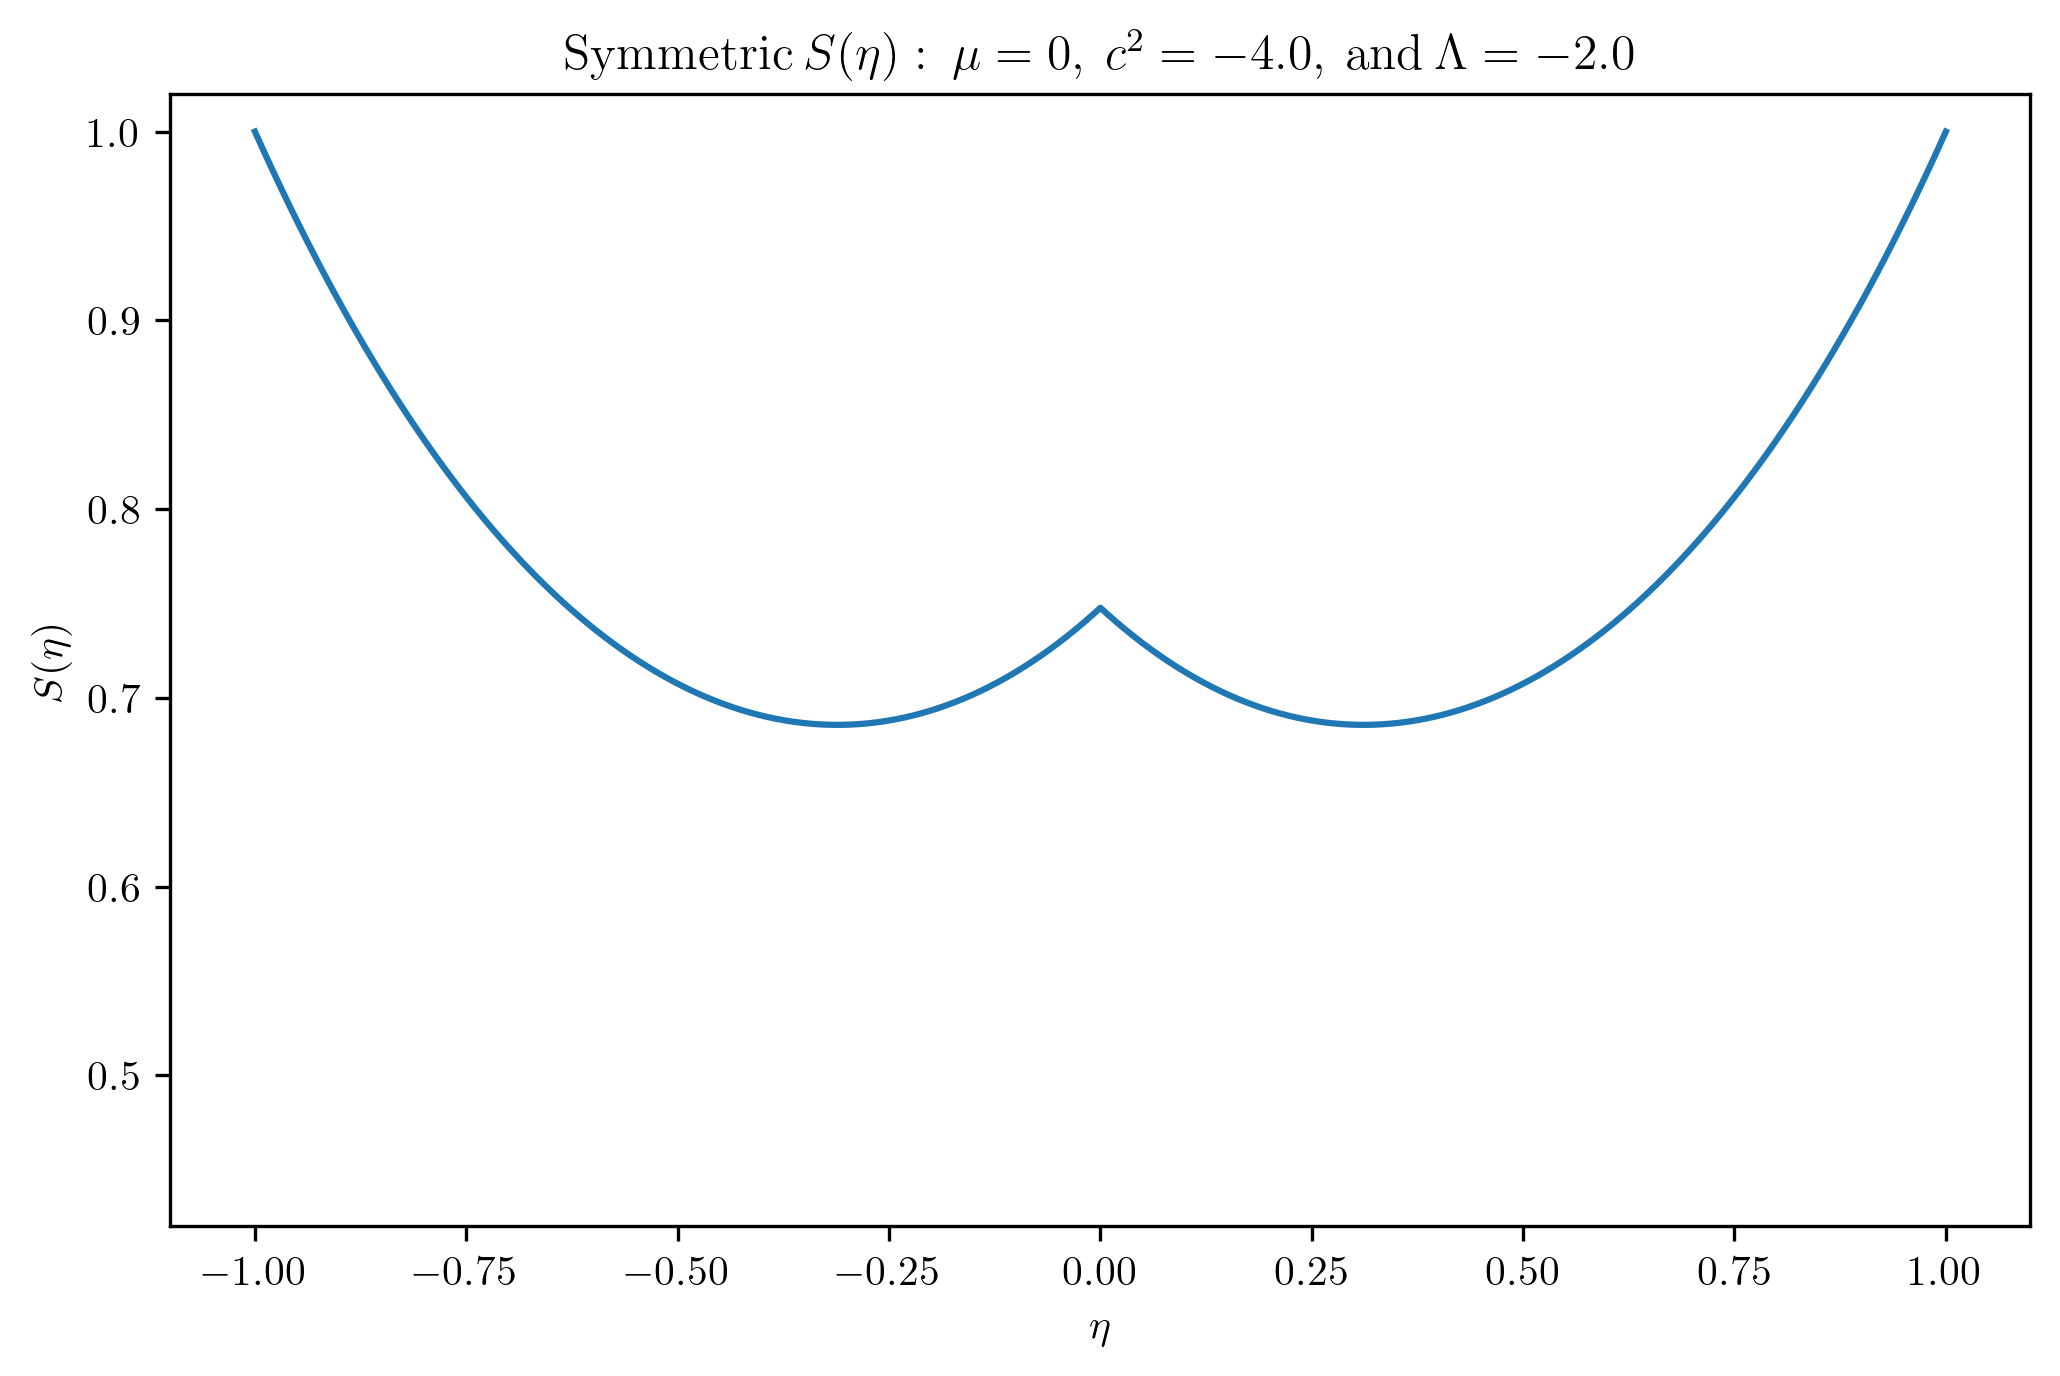

In [3]:
F = lambda eta, p: np.array([[0, 1], 
    [(mu*(mu+1) - lbda_val + c2*(eta**2))/(1 - eta**2), 2*(mu+1)*eta/(1 - eta**2)]]) @ p

# obtain values of f(eta) along these points
# we exclude eta=1 to avoid a ZeroDivisionError
eta_span = np.linspace(1.0, 0.0, 100)
eps = 1.0e-10 # a very small value
eta_span[0] = 1.0 - eps

# solve using solve_ivp
# sol.y[0] is f(eta_span) and sol.y[1] is f'(eta_span)
sol = solve_ivp(F, [1.0 - eps, 0], p1, t_eval=eta_span)
print(f"Value of f'(0) for Lambda = {lbda_val:.1f}: {sol.y[1, -1]:.5f}")


# as we are plotting S(eta), not f(eta)
S_eta = ((1 - eta_span**2) ** (mu/2)) * sol.y[0]

# add back eta=1 and S(1)=1
eta_span[0] = 1.0
S_eta[0] = 1.0


# using symmetry to construct S(eta) for -1 <= eta < 0
# S(eta) is an even function... for now
def finish_symmetry(arr, is_even=True):
    if is_even:
        sign = 1
    else:
        sign = -1
    return np.concatenate([sign * arr[:-1], arr[::-1]])

eta_span = finish_symmetry(eta_span, is_even=False)
S_eta_1st = finish_symmetry(S_eta, is_even=True)

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st)

title_str = (r'$ \mathrm{Symmetric} \: S(\eta) :'
             r'\: \mu = 0, \:  c^2 = -4.0, \:'
             r'\mathrm{and} \: \Lambda = -2.0$')
ax.set_title(title_str)
ax.set_ylim(0.42, 1.02)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

It seems like we were not able to meet the constraint $f'(0) = 0$ as $f(0) \approx -0.412 $. Let's try a different value of $\Lambda$. Before we do that, we'll encapsulate the code above into a function, in order to rapidly repeat similar calculations.

In [4]:
def calculate_S_eta(mu, c2, lbda_val, is_even, suppress_printing=True):
    p1 = np.array([1, ((mu*(mu+1) + c2 - lbda_val)/(2*(mu+1)))])
    
    F = lambda eta, p: np.array([[0, 1], 
    [(mu*(mu+1) - lbda_val + c2*(eta**2))
     /(1 - eta**2), 2*(mu+1)*eta/(1 - eta**2)]]) @ p

    # obtain values of f(eta) along these points
    # we exclude eta=1 to avoid a ZeroDivisionError
    eta_span = np.linspace(1, 0, 100)
    eps = 1.0e-10 # a very small value
    eta_span[0] = 1.0 - eps

    # solve using solve_ivp, sol.y[0] is f(eta_span) and sol.y[1] is f'(eta_span)
    sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=eta_span)
    if not suppress_printing:
        if is_even:
            print(f"Value of f'(0) for Lambda = {lbda_val:.4f}: {sol.y[1, -1]:.5f}")
        else:
            print(f"Value of f(0) for Lambda = {lbda_val:.4f}: {sol.y[0, -1]:.5f}")

    # we are plotting S(eta), not f(eta)
    S_eta = ((1 - eta_span**2) ** (mu/2)) * sol.y[0]

    # add back eta=1 and S(1)=1
    eta_span[0] = 1.0
    S_eta[0] = 1.0
    
    # using symmetry to construct S(eta) for -1 <= eta < 0
    eta_span = finish_symmetry(eta_span, is_even=False)
    S_eta = finish_symmetry(S_eta, is_even=is_even)
    
    return S_eta

We will try $\Lambda = -1.5$ for the same $\mu$ and $c^2$.

Value of f'(0) for Lambda = -1.5000: 0.08201


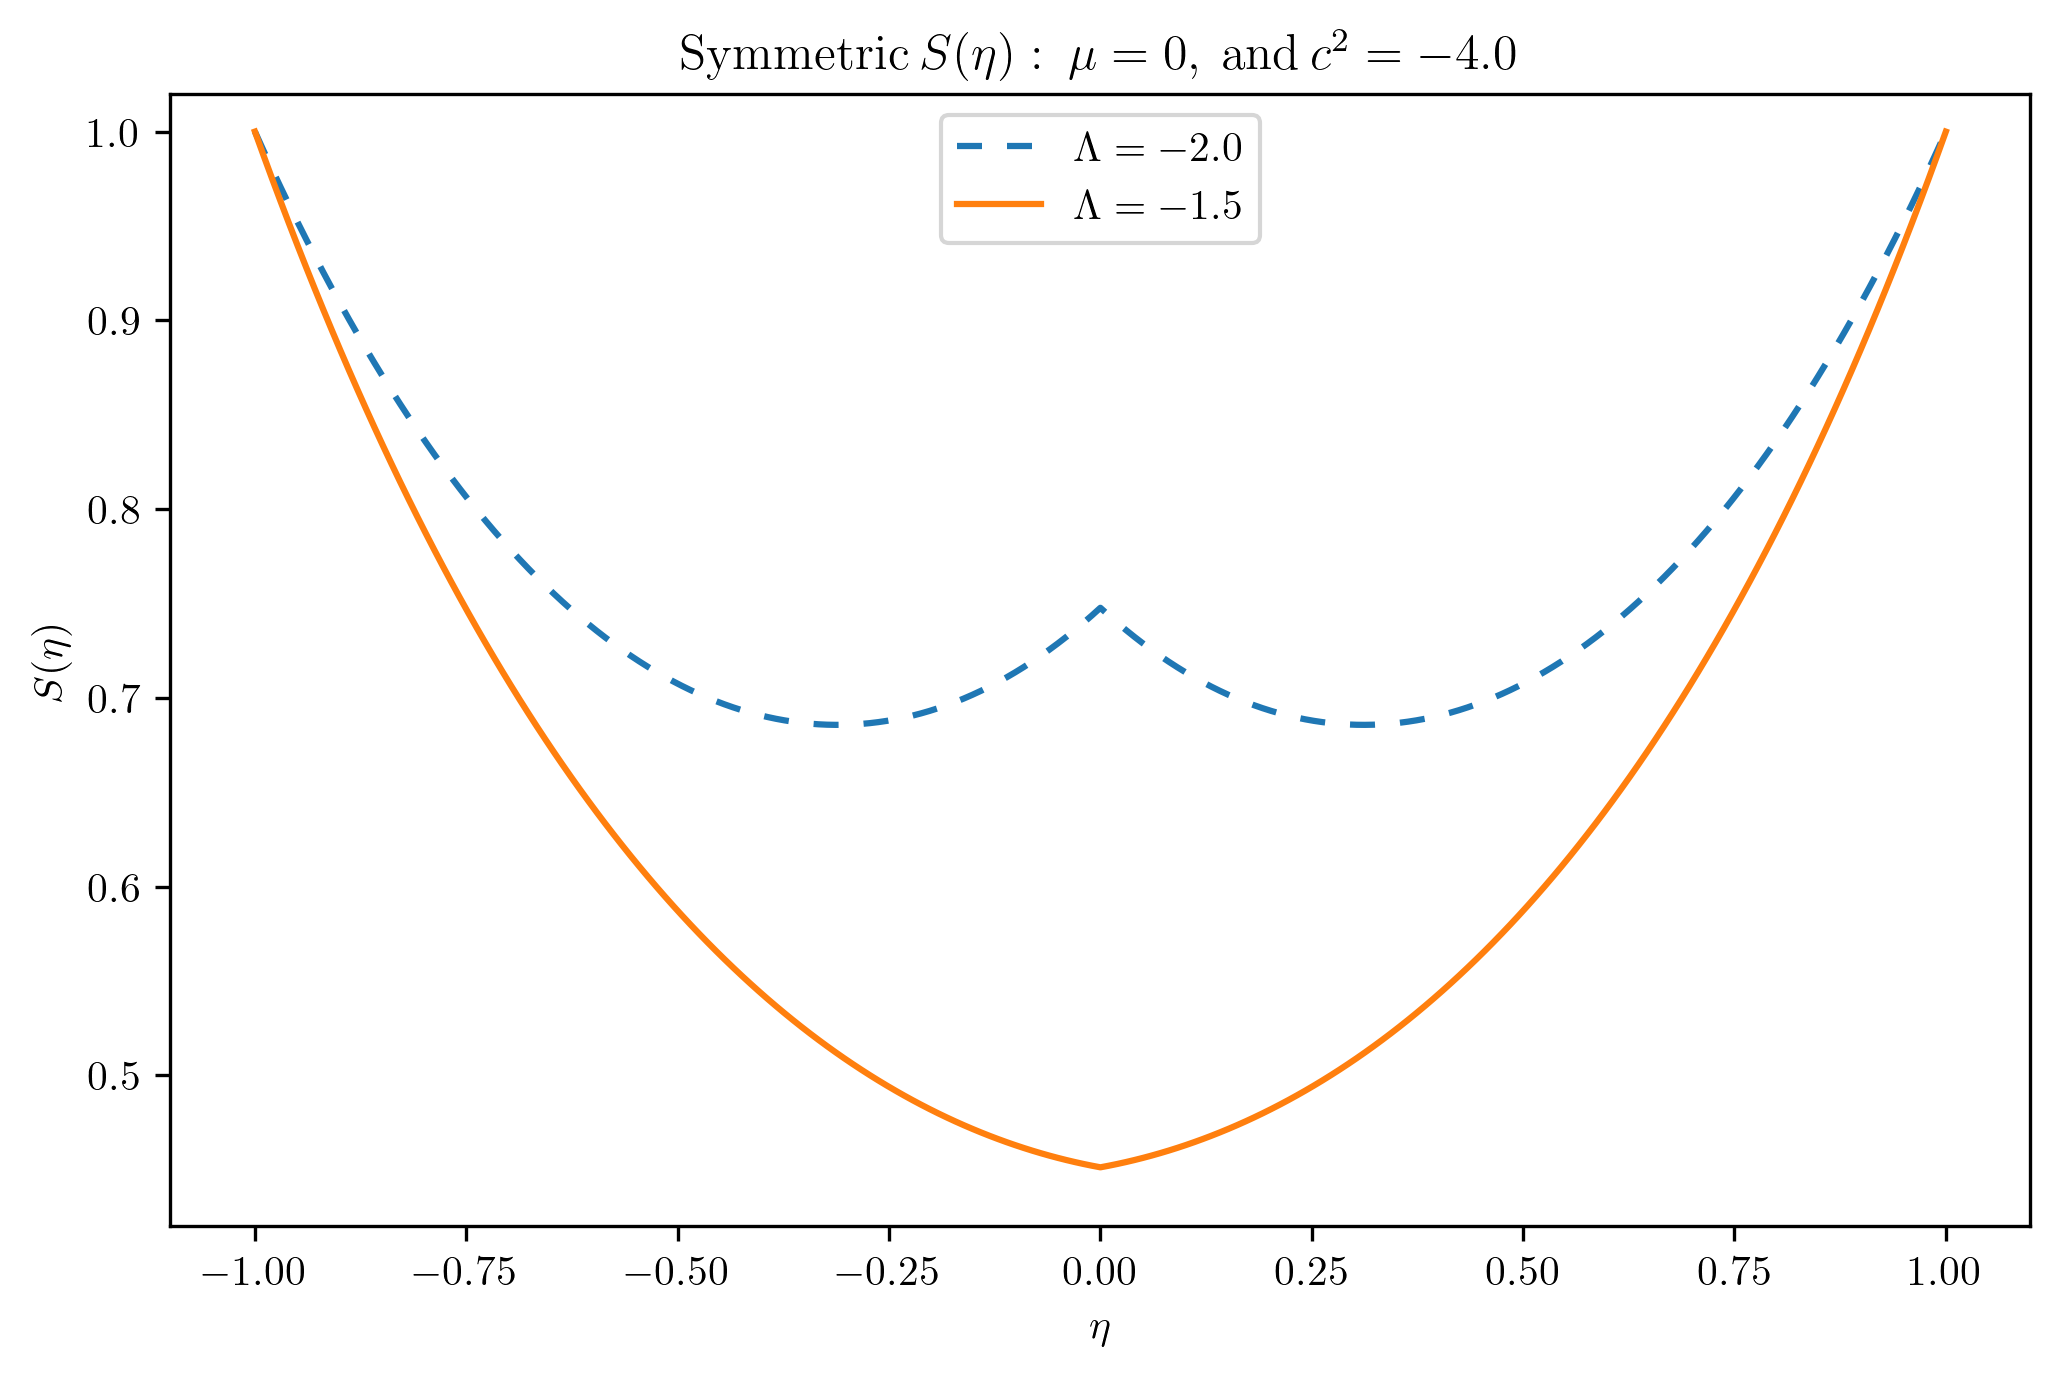

In [5]:
S_eta_2nd = calculate_S_eta(mu, c2, -1.5, 
                            True, suppress_printing=False)

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st, label=r'$\Lambda = -2.0$', ls=(0, (4, 4)))
ax.plot(eta_span, S_eta_2nd, label=r'$\Lambda = -1.5$')

title_str = (r'$ \mathrm{Symmetric} \: S(\eta) :'
             r'\: \mu = 0, \:'
             r'\mathrm{and} \: c^2 = -4.0$')
ax.set_title(title_str)
ax.legend(loc=9)
ax.set_ylim(0.42, 1.02)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

We were able to improve $f'(0)$ from -0.412 to 0.082, a bit higher than. For the next attempt, we will aim slightly lower, with $\Lambda = -1.7$. Ultimately, several more attempts are required to fine-tune $f'(0)$ to equal 0.

Value of f'(0) for Lambda = -1.7000: -0.09771
Value of f'(0) for Lambda = -1.5944: 0.00002


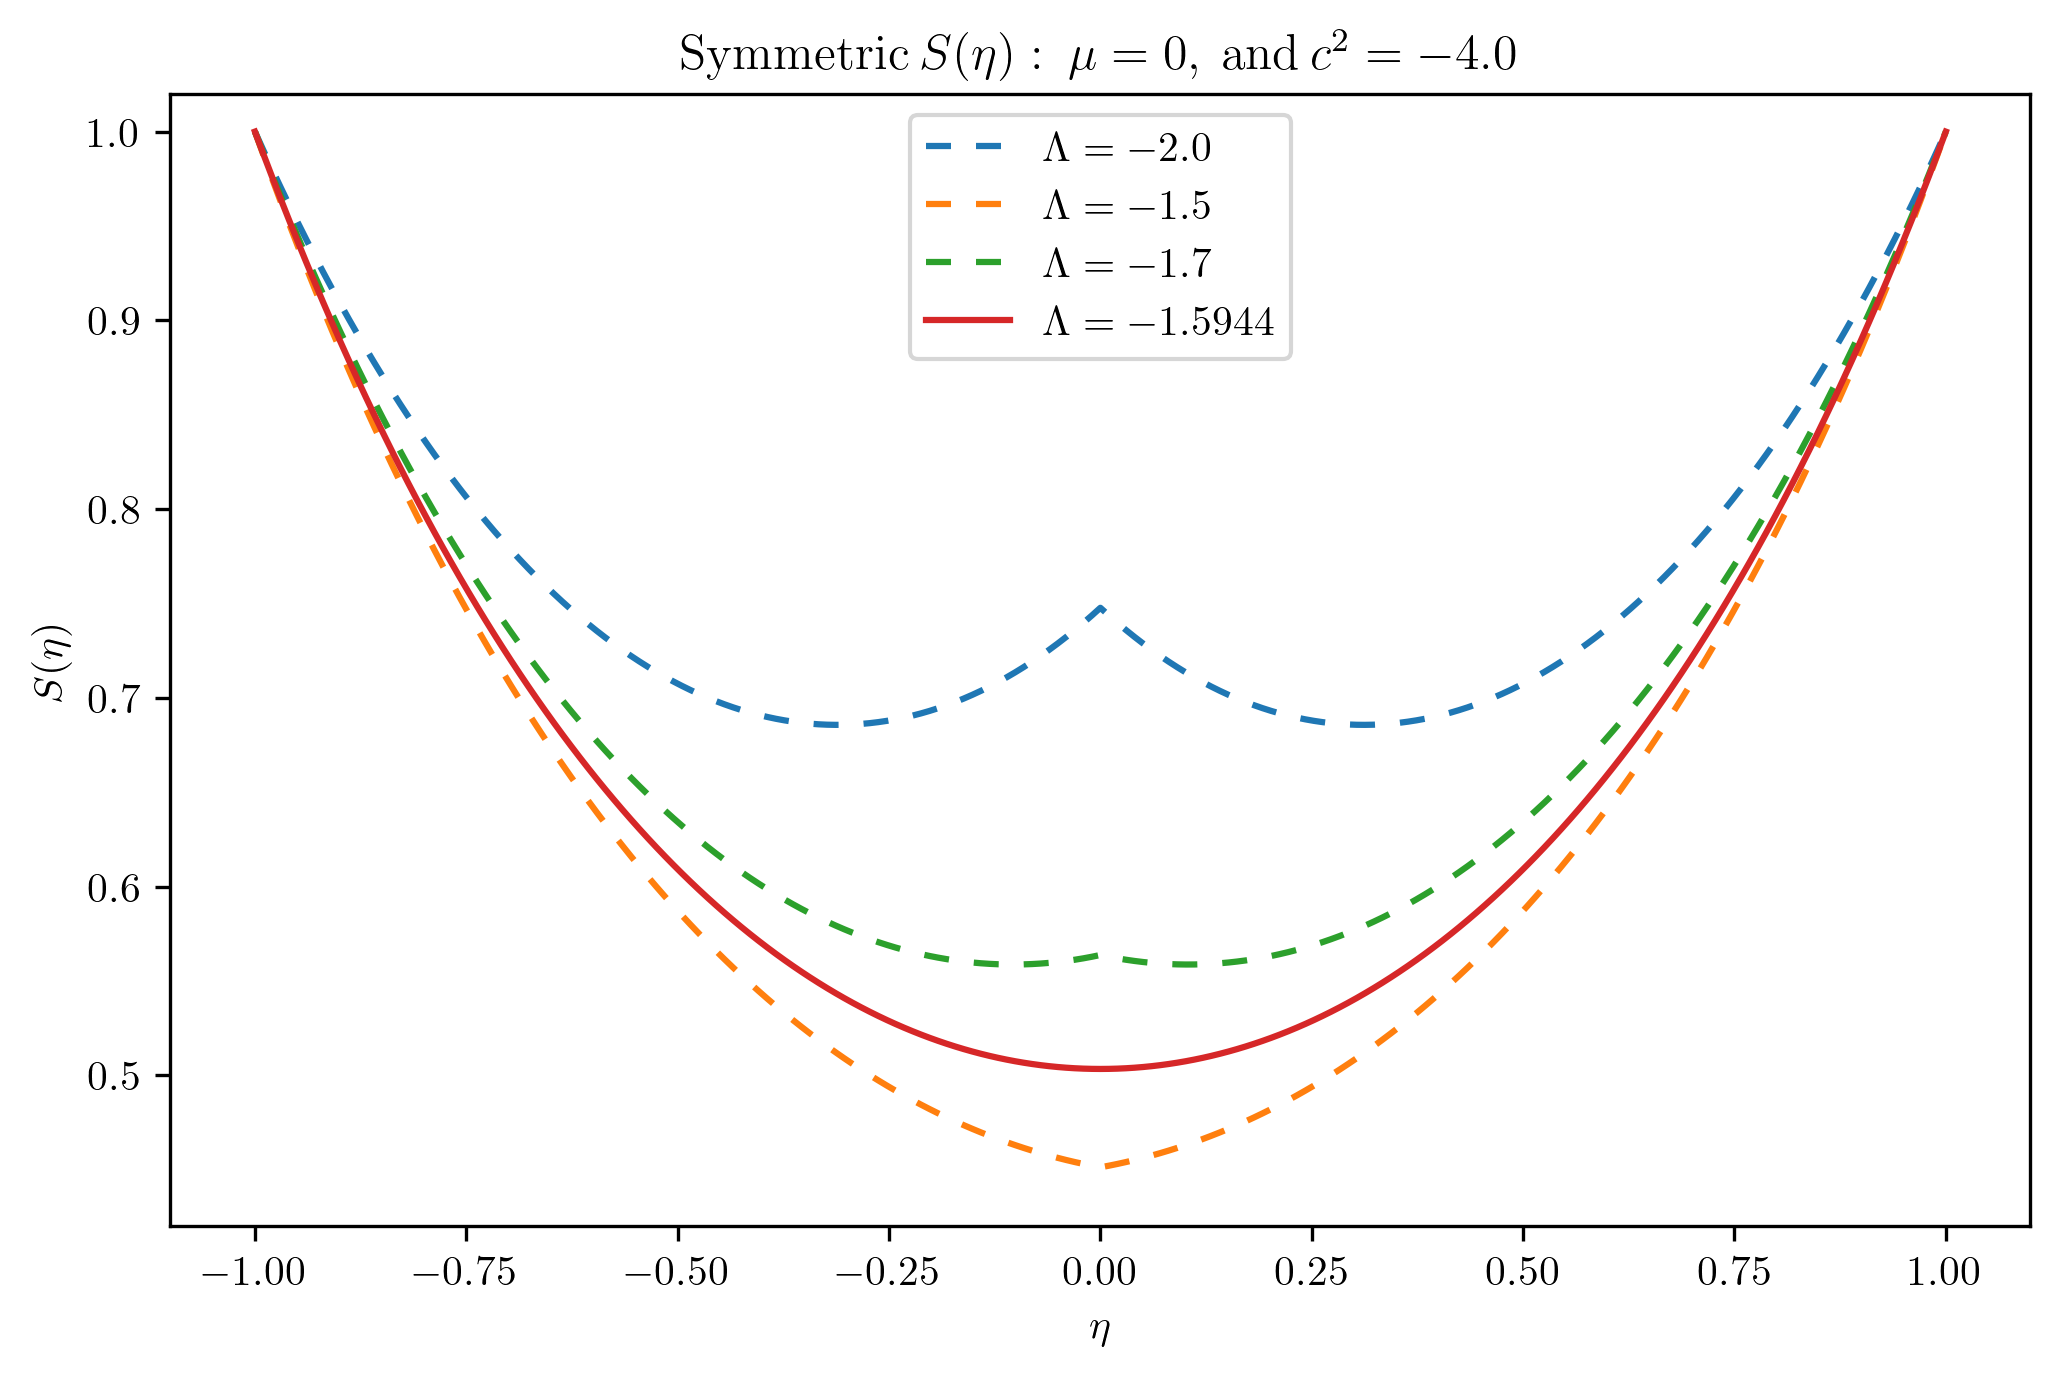

In [6]:
S_eta_3rd = calculate_S_eta(mu, c2, -1.7, 
                            True, suppress_printing=False)
# theoretially, repeating this process yields 
# Lambda = -1.594419579223602
S_eta_final = calculate_S_eta(mu, c2, -1.5944, 
                              True, suppress_printing=False)

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta_1st, label=r'$\Lambda = -2.0$', ls=(0, (4, 4)))
ax.plot(eta_span, S_eta_2nd, label=r'$\Lambda = -1.5$', ls=(0, (4, 4)))
ax.plot(eta_span, S_eta_3rd, label=r'$\Lambda = -1.7$', ls=(0, (4, 4)))

ax.plot(eta_span, S_eta_final, label=r'$\Lambda = -1.5944$', )
title_str = (r'$ \mathrm{Symmetric} \: S(\eta) :'
             r'\: \mu = 0, \:'
             r'\mathrm{and} \: c^2 = -4.0$')
ax.set_title(title_str)
ax.legend(loc=9)
ax.set_ylim(0.42, 1.02)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

We were able to optimize $f'(0)$: $-0.412 \to 0.082 \to -0.098 \to \cdots \to 0.00002$, with a final result of $\Lambda = -1.5944$. However, instead of optimizing $f'(0)$ by hand, how about we optimize $f'(0)$ with another SciPy function, `scipy.optimize.fsolve`?

`fsolve` works by finding the root of a particular function by varying its input. In our usage case, we define a function `objective` with $\Lambda$ with its input and $f'(0)$ as its output.

Value of f(0) for Lambda = -1.1053: 0.25159
Value of f(0) for Lambda = -0.5053: 0.00000
Value of f(0) for Lambda = -0.2053: -0.10452


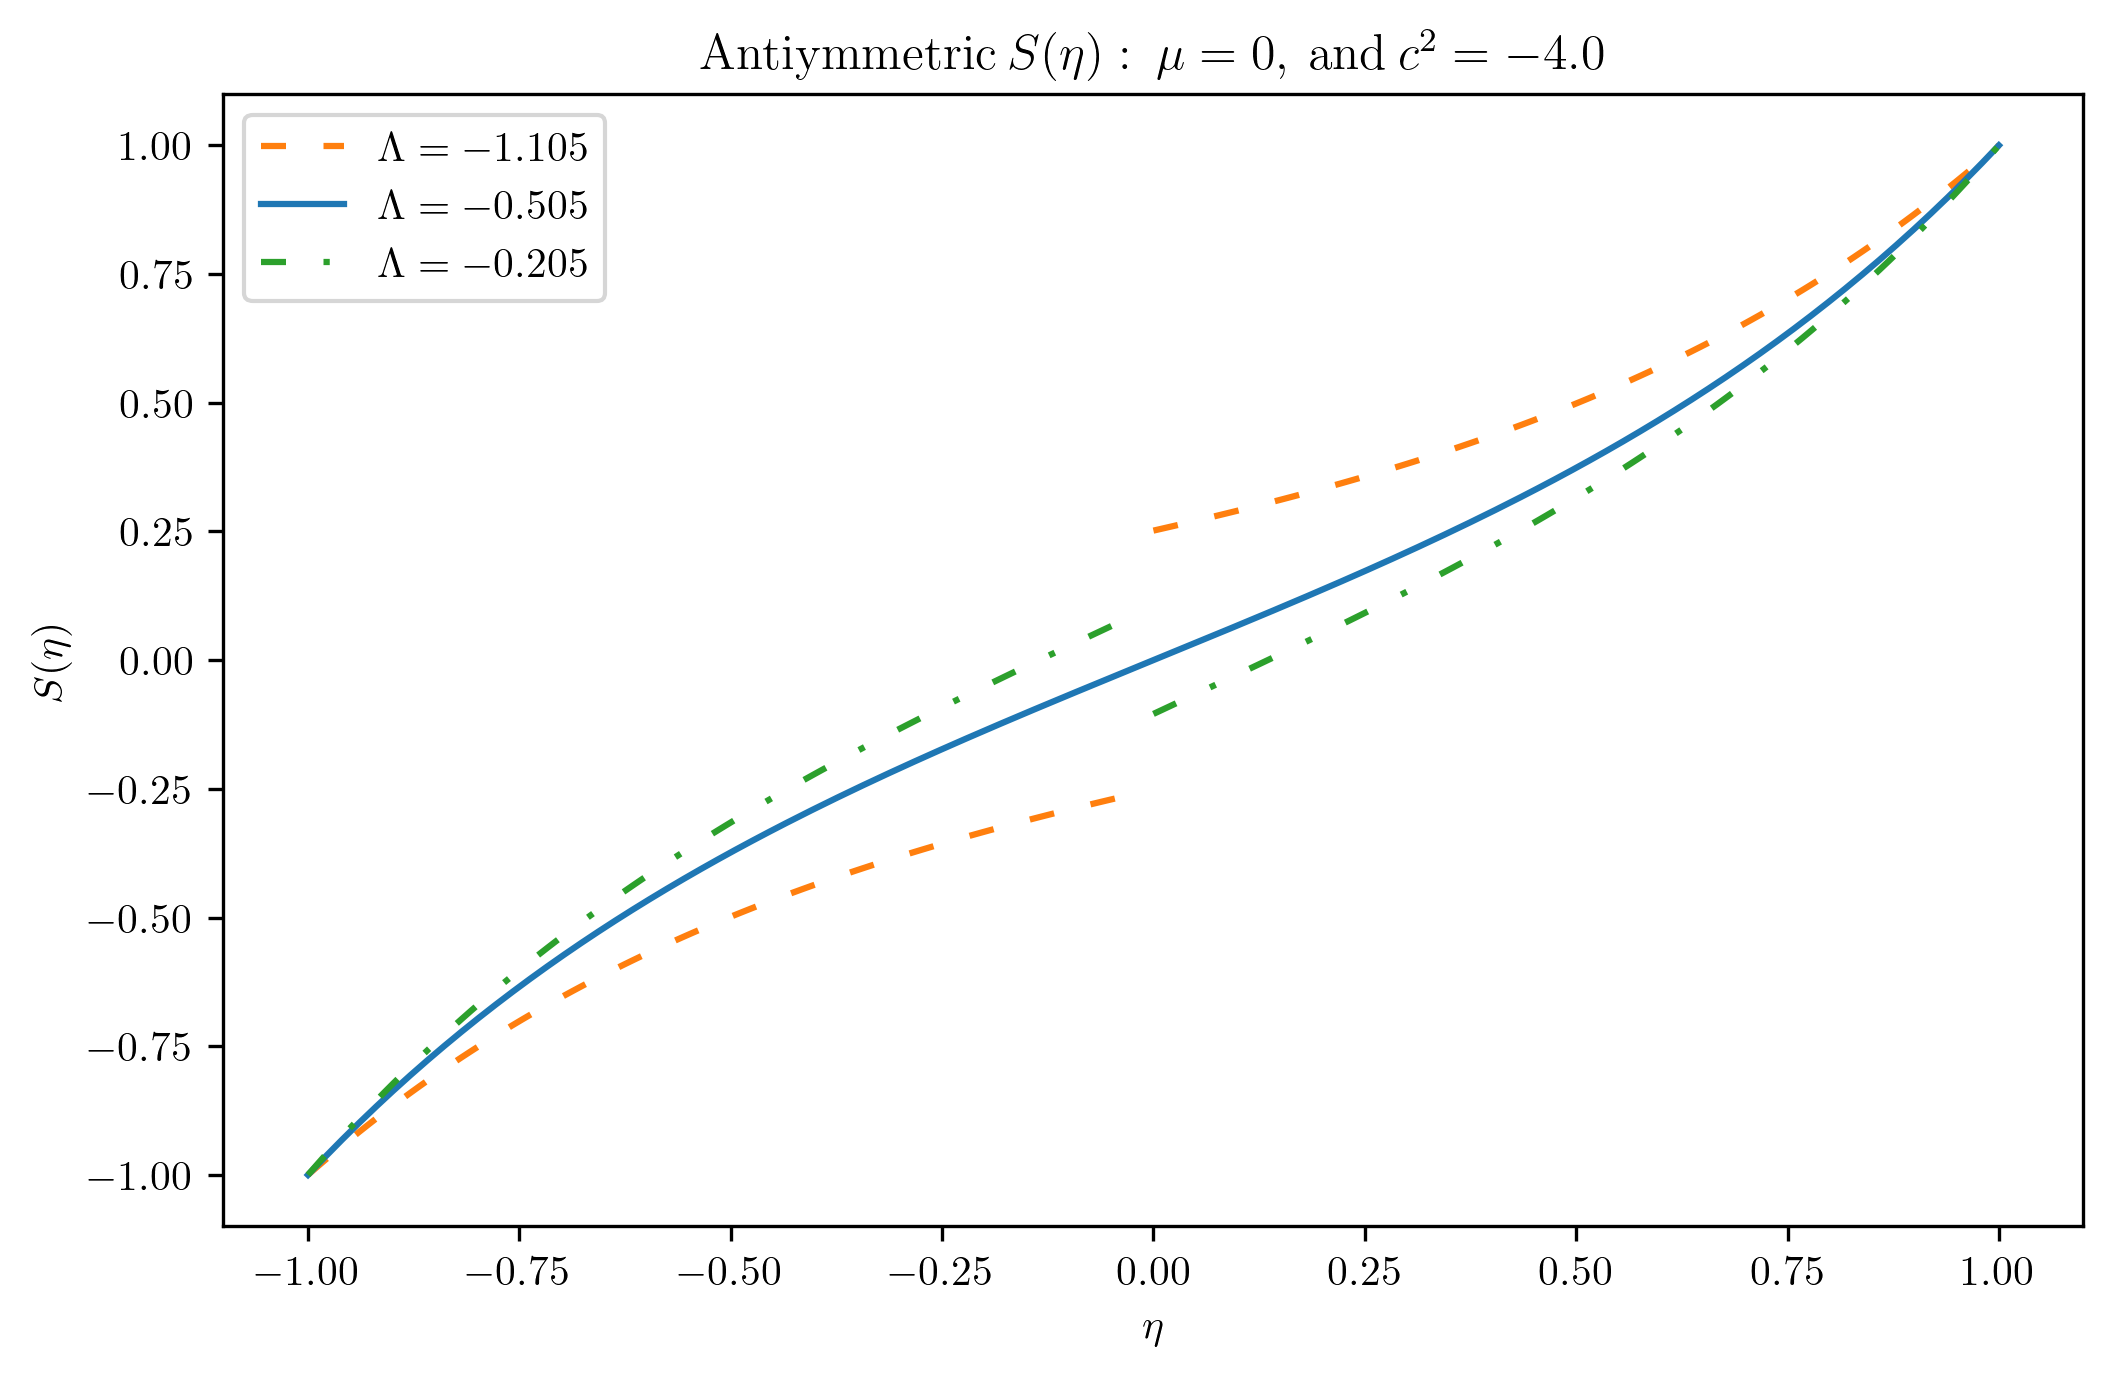

In [7]:
from scipy.optimize import fsolve

# antisymmetric
is_even = False

# note: the objective function must be able to 
# take vectorized inputs for fsolve to work
@np.vectorize
def objective(lbda_val):
    p1 = np.array([1, ((mu*(mu+1) + c2 - lbda_val)/(2*(mu+1)))])
    
    F = lambda eta, p: np.array([[0, 1], 
    [(mu*(mu+1) - lbda_val + c2*(eta**2))
     /(1 - eta**2), 2*(mu+1)*eta/(1 - eta**2)]]) @ p

    # obtain values of f(eta) along these points
    # we exclude eta=1 to avoid a ZeroDivisionError
    eta_span = np.linspace(1, 0, 100)
    eps = 1.0e-10 # a very small value
    eta_span[0] = 1.0 - eps

    # evaluate f(0) or f'(0) only
    sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=[0])
    if is_even:
        return sol.y[1, -1] # f'(0) optimized to be zero
    else:
        return sol.y[0, -1] # f(0) optimized to be zero
    
lbda_val_guess = -0.5 # initial guess   
lbda_val_final, = fsolve(objective, lbda_val_guess)


# evaluate S_eta of Lambda values near lbda_val_final
# for demonstration purposes
lbda_vals = np.array([-0.6, 0, 0.3]) + lbda_val_final

fig, ax = plt.subplots()

colors = ['C1', 'C0', 'C2']
lss = [(0, (4, 6)), "-", (0, (4, 6, 1, 6))]

for ind, lbda_val in enumerate(lbda_vals):
    S_eta = calculate_S_eta(mu, c2, lbda_val, 
                            is_even=is_even, suppress_printing=False)
    lbda_val_label = r'$\Lambda = ' + f'{lbda_val:.3f}' + '$'
    if ind == 1:
        # not separated at eta=0 - continuous line
        ax.plot(eta_span, S_eta, 
                label=lbda_val_label, color=colors[ind], ls=lss[ind])
    else:
        # separated at eta = 0 to show discontinuity properly
        ax.plot(eta_span[:99], S_eta[:99], 
                label=lbda_val_label, color=colors[ind], ls=lss[ind])
        ax.plot(eta_span[99:], S_eta[99:], 
                color=colors[ind], ls=lss[ind])

title_str = (r'$ \mathrm{Antiymmetric} \: S(\eta) :'
             r'\: \mu = 0, \:'
             r'\mathrm{and} \: c^2 = -4.0$')
ax.set_title(title_str)
ax.legend()
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

Note that with different initial guesses of $\Lambda$, a different $S(\eta)$ of the same symmetry can also be calculated.

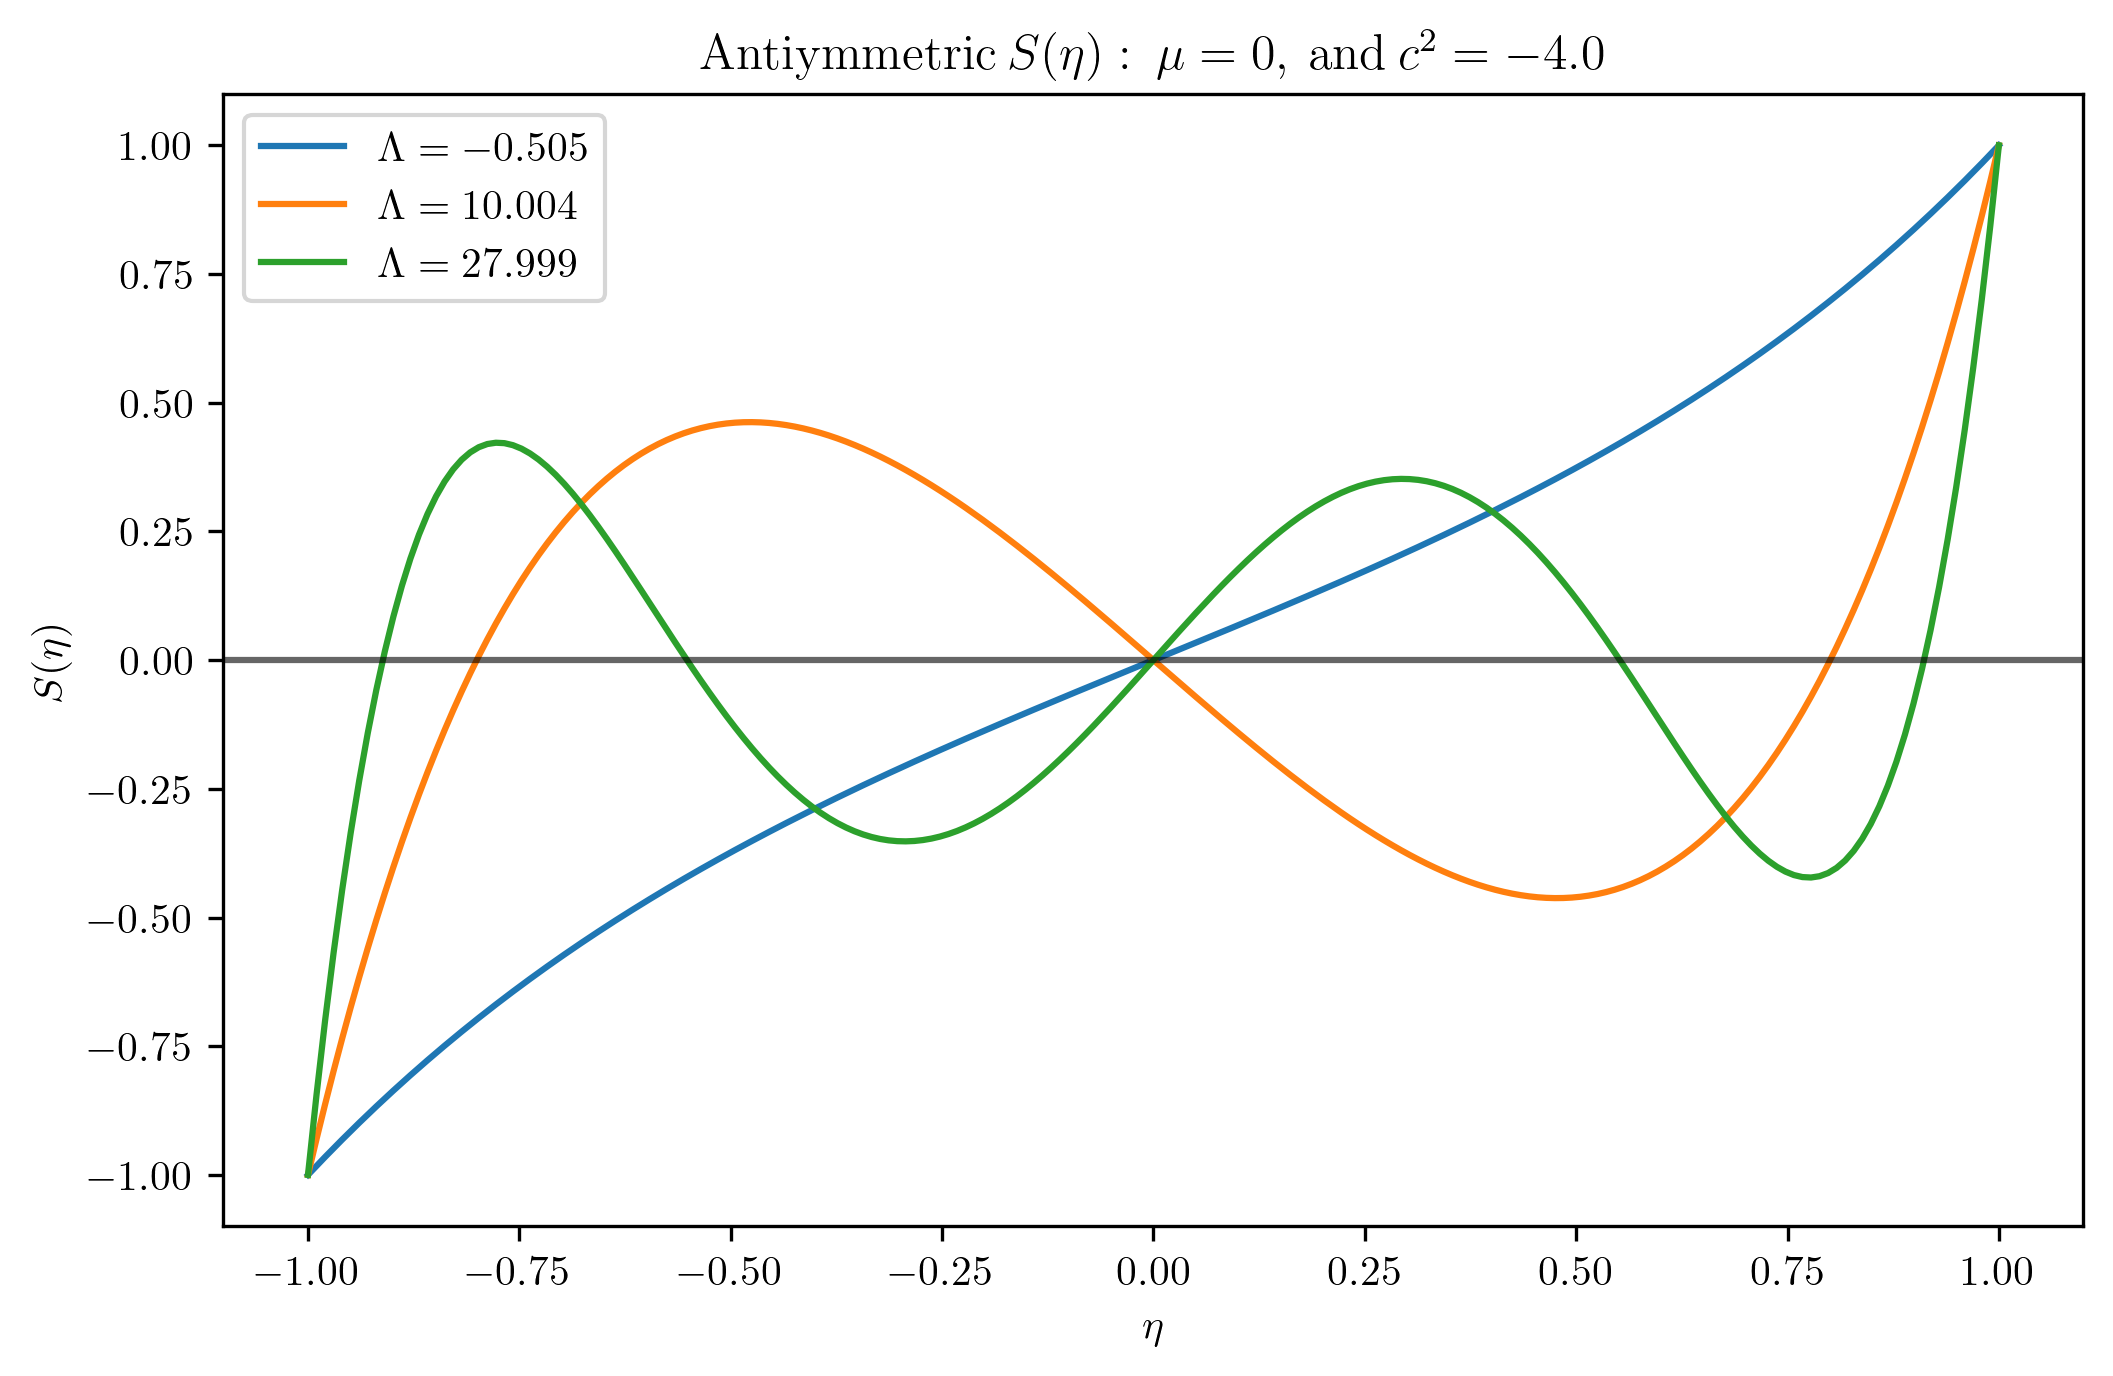

In [8]:
is_even = False # same symmetry

# previous example
S_eta = calculate_S_eta(mu, c2, lbda_val_final, is_even=is_even)
lbda_val_label = r'$\Lambda = ' + f'{lbda_val_final:.3f}' + '$'

fig, ax = plt.subplots()
ax.plot(eta_span, S_eta, label=lbda_val_label)

# plot S(eta) for greater values of Lambda
for lbda_val_guess in [10.0, 28.0]:
    lbda_val_final, = fsolve(objective, lbda_val_guess)
    
    # new example
    S_eta = calculate_S_eta(mu, c2, lbda_val_final, is_even=is_even)
    lbda_val_label = r'$\Lambda = ' + f'{lbda_val_final:.3f}' + '$'
    ax.plot(eta_span, S_eta, label=lbda_val_label)

title_str = (r'$ \mathrm{Antiymmetric} \: S(\eta) :'
         r'\: \mu = 0, \:'
         r'\mathrm{and} \: c^2 = -4.0$')
ax.set_title(title_str)
ax.legend()
ax.axhline(y=0, color='k', alpha=0.6)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$S(\eta)$');

One thing to take note of is the number of roots of $S(\eta)$, which is the number of angular nodes between the two nuclei. Greater values of $\Lambda$ corresponds to more of such nodes. 

The remaining angular nodes (all $\mu$ in total) contain the internuclear axis, and this is determined by the $\Phi(\phi)=e^{im\phi}$ as shown previously.

In total, there are $l$ nodes (more precisely, let us explicitly define the number of angular nodes as $l$), with $l - \mu$ angular nodes between the two nuclei and $\mu$ nodes that contain the internuclear axis.

### A change in perspective

With the above example, we were able to obtain valid pairs of $c^2$ and $\Lambda$ for a particular symmetry and $\mu$. As one may have noticed, $c^2$ and $\Lambda$ have a functional relationship. Recall the equation below.

$$-\frac{1}{S} \frac{d }{d \eta}\left [ \left ( 1 - \eta^2 \right ) \frac{d S}{d \eta} \right ] -\frac{\mu^2}{1- \eta^2} -c^2\eta^2  = \Lambda $$

As $\eta$ is does not affect $\Lambda$ (recall how $\Lambda$ is independent of both $\xi$ and $\eta$) and as the function $S$ is ultimately decided by symmetry and $c^2$, the only variable to control $\Lambda$ is $c^2$. Thus, for a given symmetry and $m$, we can define the expression above as a function of $c^2$.

$$ \Lambda(c^2) = -\frac{1}{S} \frac{d }{d \eta}\left [ \left ( 1 - \eta^2 \right ) \frac{d S}{d \eta} \right ] -\frac{\mu^2}{1- \eta^2} -c^2\eta^2 \text{ for a particular symmetric/antisymmetric function }S(\eta)$$

Although it is somewhat possible to attain this relationship analytically, it is very difficult. A less mathematically demanding alternative is to sample many values of $\Lambda$ for many values of $c^2$ and then use interpolation with `scipy.interpolate.interp1d`.

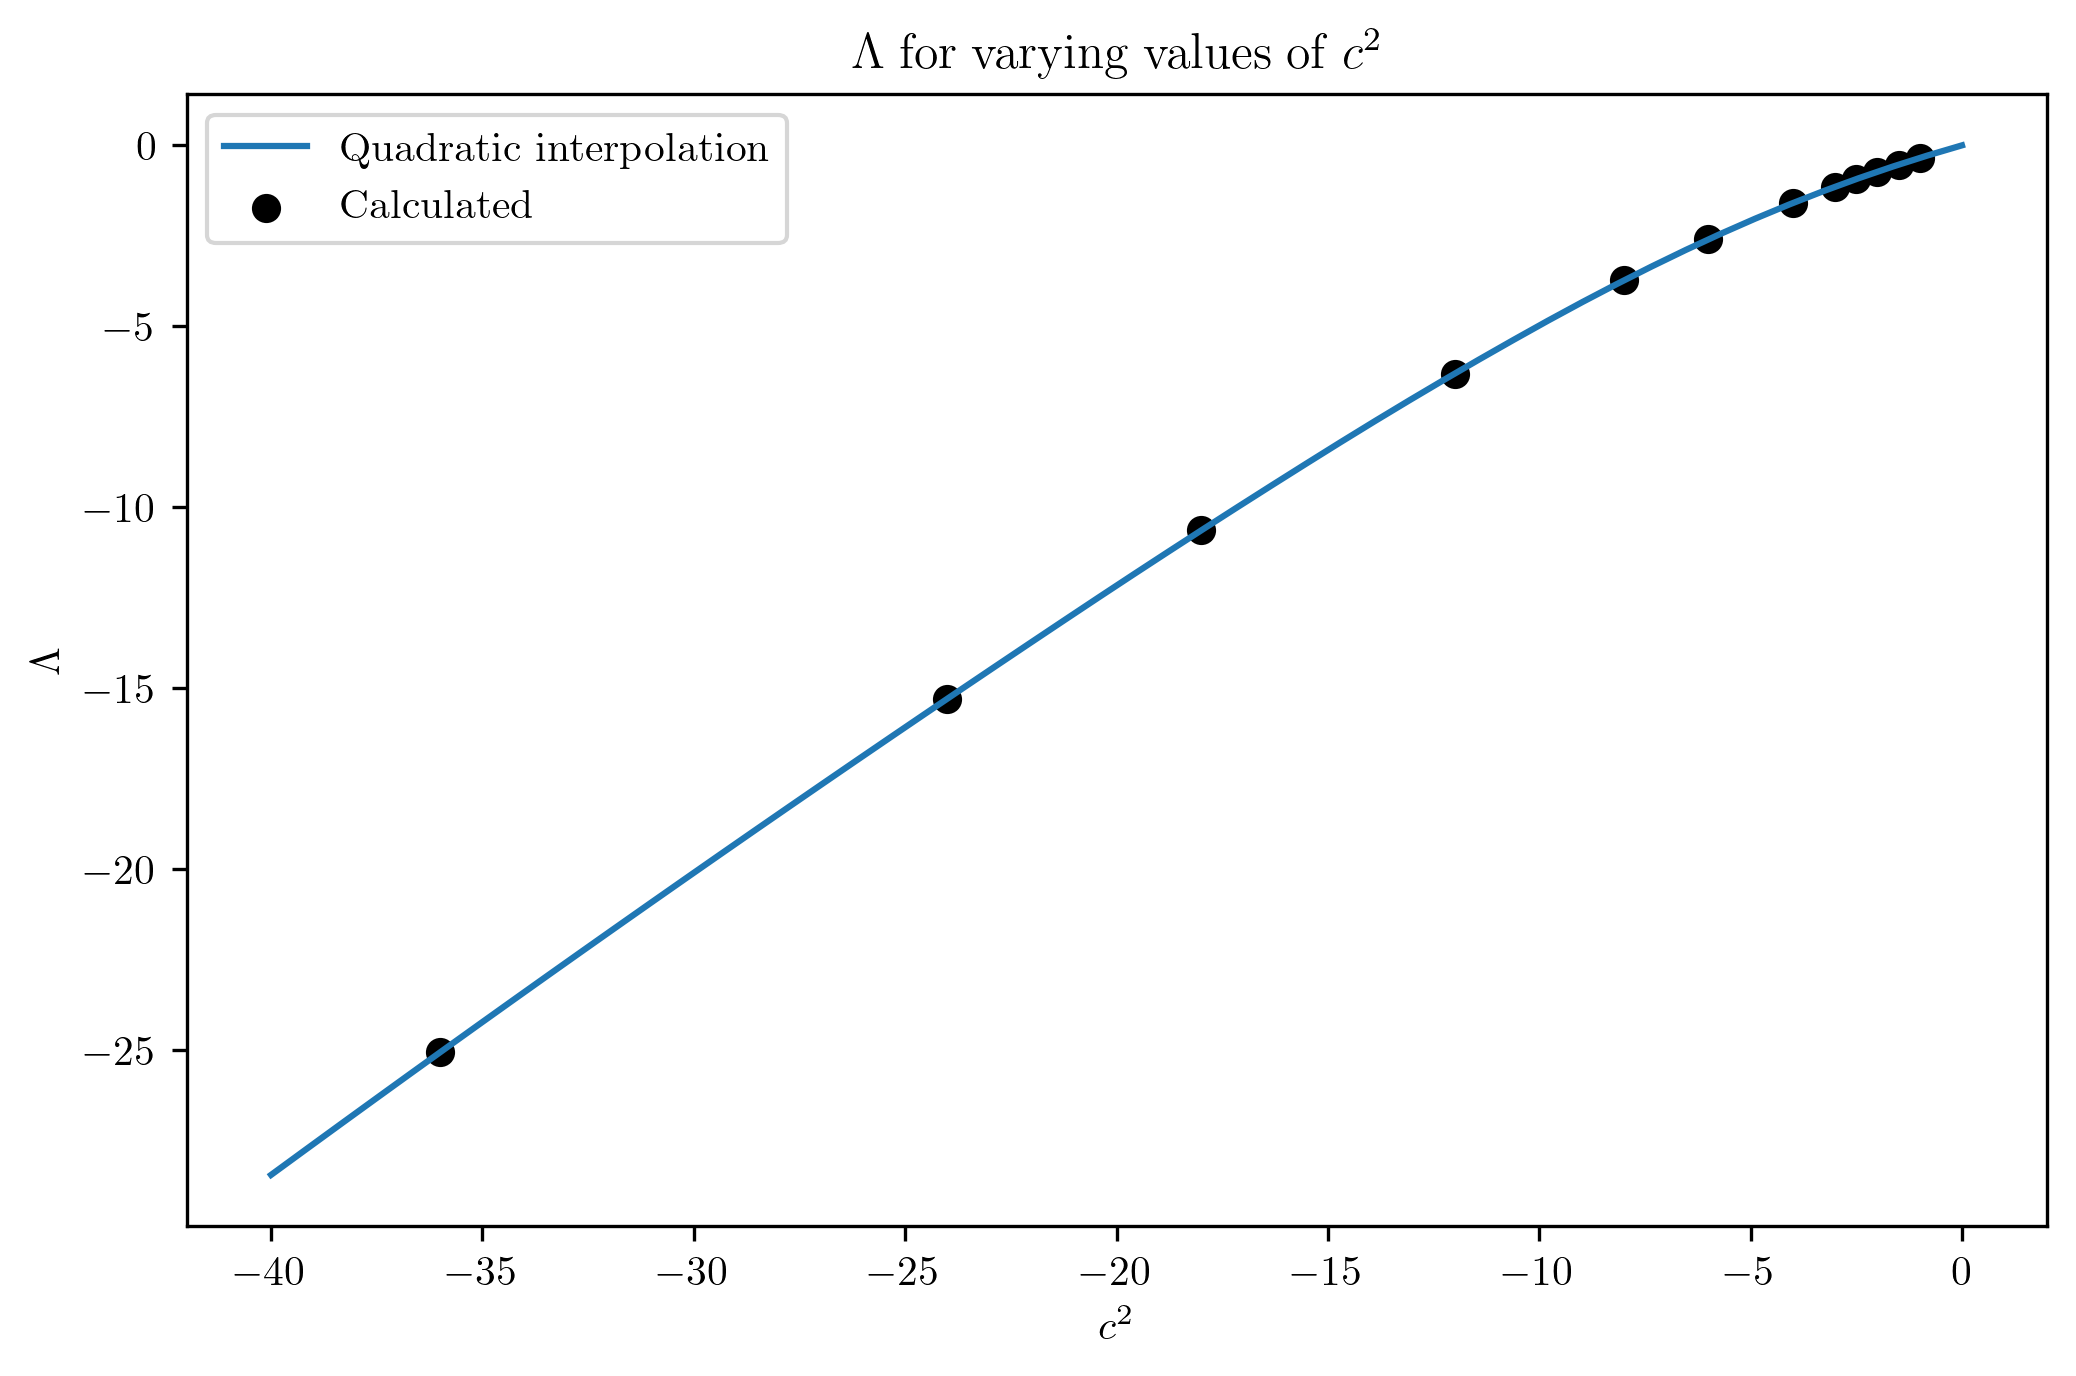

In [9]:
# for a given symmetry and mu (just to be clear), the case for l=0
is_even = True
mu = 0
l = 0

# Lambda values calculated for these values of c^2
c2s = np.array((-1, -1.5, -2, -2.5, -3, -4, -6, -8, -12, -18, -24, -36))
# note: the initial guess of Lambda (lbda_guess_func) 
# is based on the final calculations
# given at the end of this notebook
lbda_guess_func = lambda x: l*(l+1) + 0.45 * x - 0.005 * (x**2)

lbda_vals = []
# note: the c2 of the loop below overides the c2 defined globally
# thus, objective() uses the correct c2 value
for c2 in c2s:
    lbda_vals.append(fsolve(objective, lbda_guess_func(c2))[0])

# using quadratic interpolation
from scipy.interpolate import interp1d
lbda_interp = interp1d(c2s, lbda_vals, 
                       kind='quadratic', fill_value='extrapolate')

fig, ax = plt.subplots()
ax.scatter(c2s, lbda_vals, label="Calculated", color='k')
c2_span = np.linspace(-40, 0, 50)
ax.plot(c2_span, lbda_interp(c2_span), label="Quadratic interpolation")

title_str = (r'$ \Lambda \; \mathrm{for} \;'
             r'\mathrm{varying} \; \mathrm{values}'
             r'\; \mathrm{of} \; c^2 $')
ax.set_title(title_str)
ax.set_xlabel(r'$ c^2 $')
ax.set_ylabel(r'$ \Lambda $')
ax.legend();

A more elegant way is to fit the $\Lambda$ data into a fourth-degree polynomial. Before we fit any data, we first investigate what happens to $\Lambda$ as $D \to 0+$ (and subsequently $c^2 \to 0-$). The differential equation becomes idential to that of the associated Legendre polynomials with eigenvalues $\Lambda=l\left ( l+1 \right )$. 

$$\Lambda(c^2) = a_0 + a_1 \left ( c^2 \right ) + a_2 \left ( c^2 \right )^2 + a_3 \left ( c^2 \right )^3 + a_4 \left ( c^2 \right )^4 \text{ where } a_0 = l\left ( l+1 \right )$$

0.0 + 0.31597234306643657 x**1 - 0.022707530260297933 x**2 -
0.0004905269717853812 x**3 - 4.2483026597755206e-06 x**4


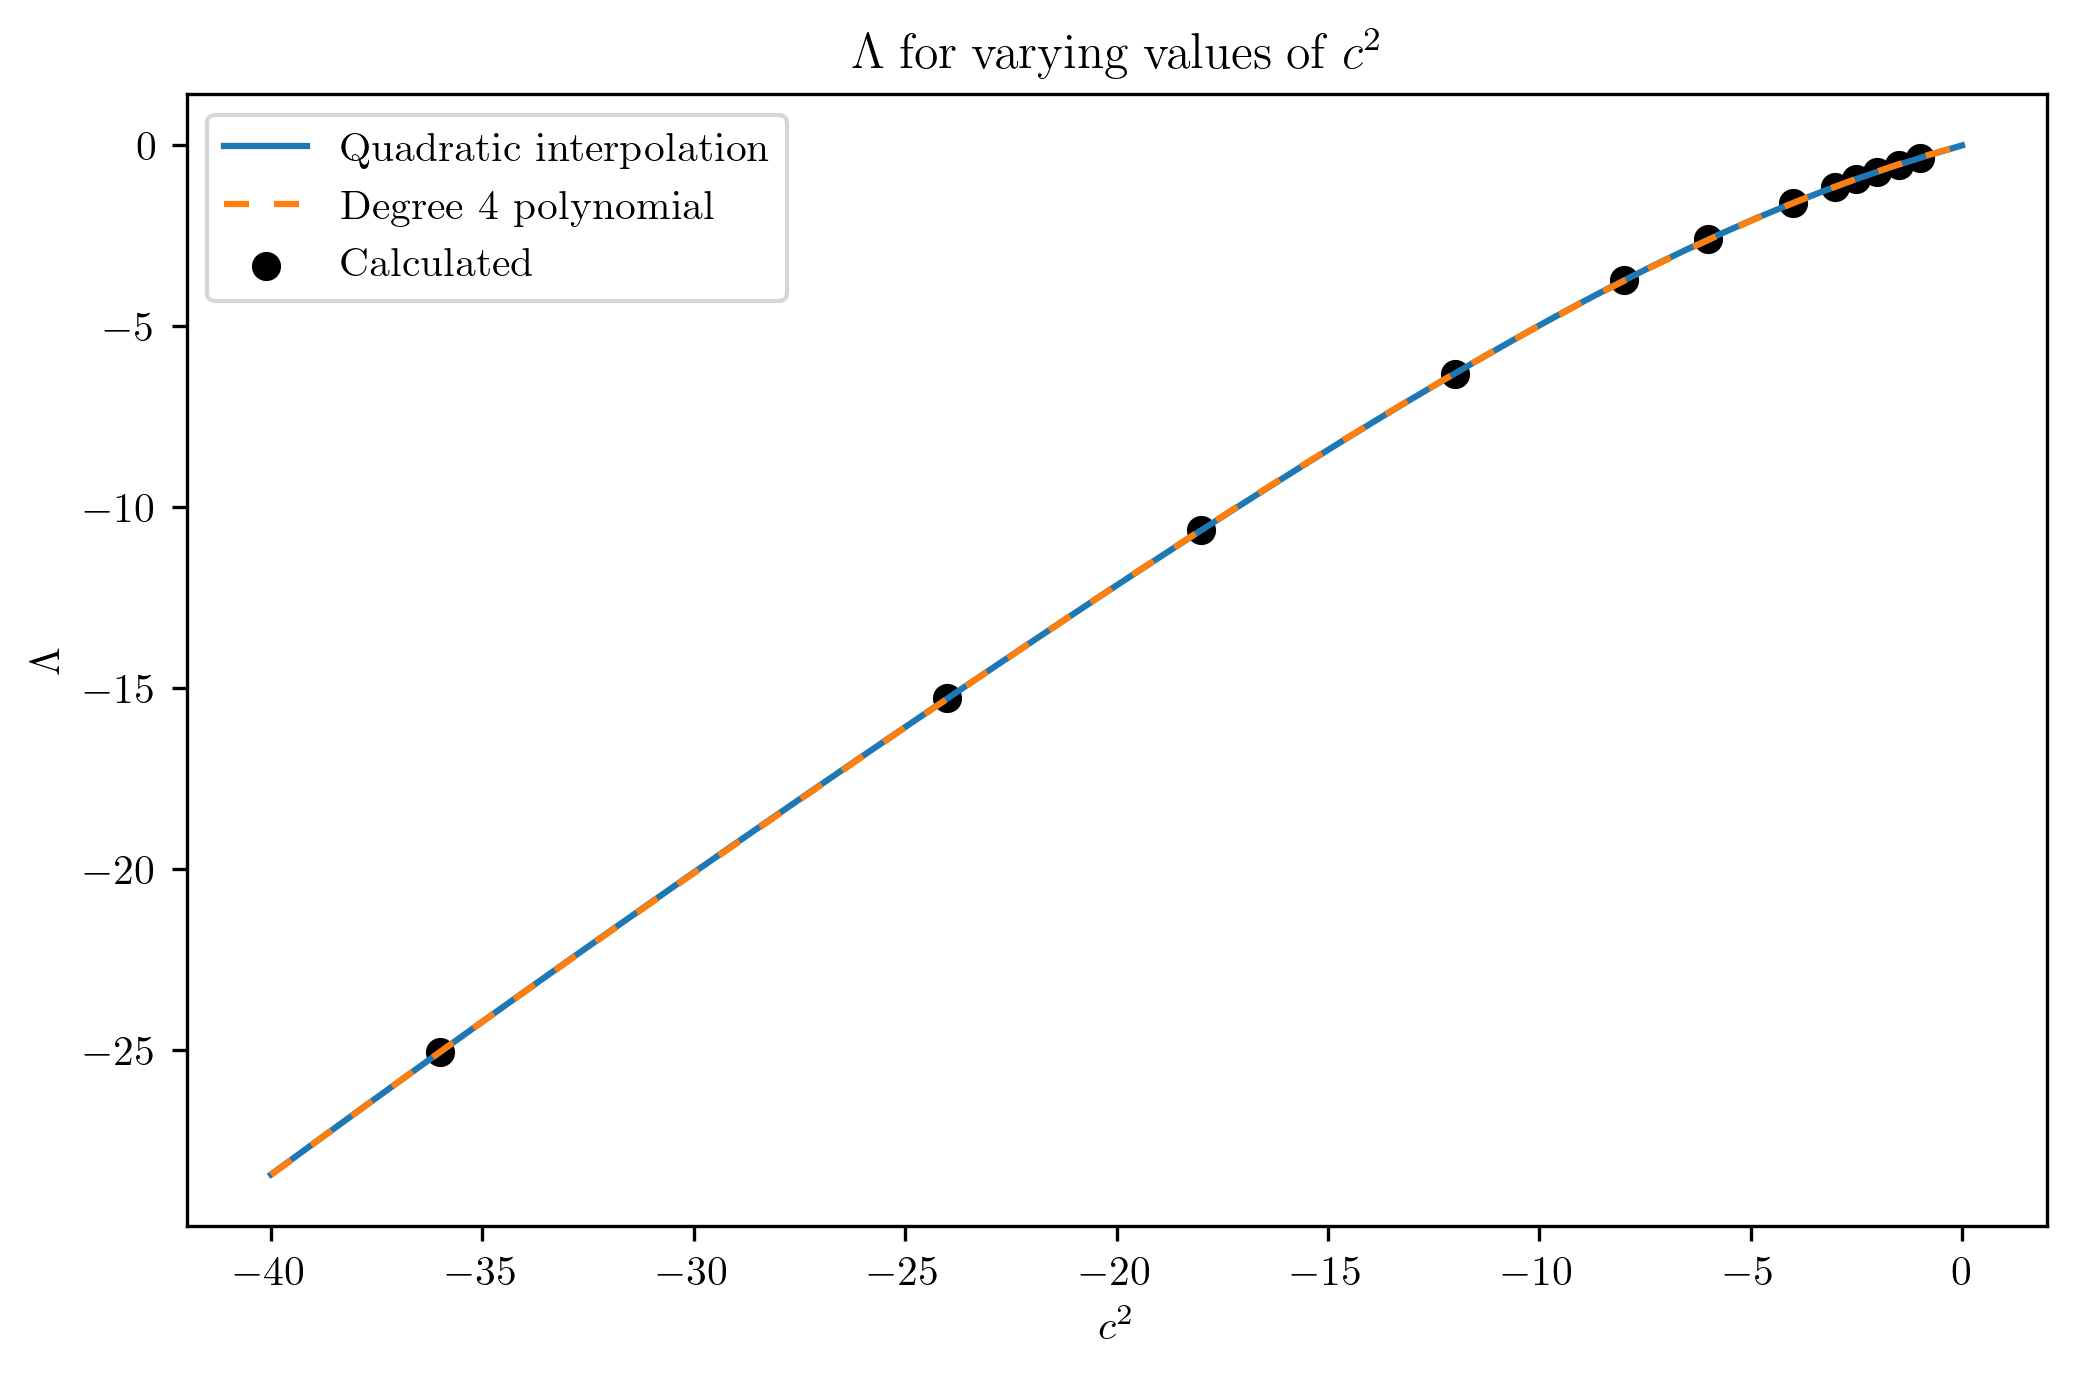

In [10]:
# instead of using the numpy polynomial module 
# to fit the fourth-degree polynomial,
# we use scipy.optimize.curve_fit
# as the y-intercept is already determined
from scipy.optimize import curve_fit
# Lambda polynomial saved as a numpy polynomial
from numpy import polynomial as P

# the polynomial to be fitted
def lbda_func(c2, a1, a2, a3, a4):
    return l*(l+1) + a1*c2 + a2*(c2**2) + a3*(c2**3) + a4*(c2**4)

# popt contains the coefficients except a0, lbda_poly is the polynomial
popt, _ = curve_fit(lbda_func, c2s, lbda_vals)
lbda_poly = P.Polynomial(np.concatenate([np.array([l*(l+1)]), popt]))
print(lbda_poly)

fig, ax = plt.subplots()
ax.scatter(c2s, lbda_vals, label="Calculated", color='k')
c2_span = np.linspace(-40, 0, 50)
ax.plot(c2_span, lbda_interp(c2_span), label="Quadratic interpolation", 
        ls='-', alpha=1)
ax.plot(c2_span, lbda_poly(c2_span), label="Degree 4 polynomial", 
        ls=(0, (4, 4)), alpha=1)

title_str = (r'$ \Lambda \; \mathrm{for} \;'
             r'\mathrm{varying} \; \mathrm{values}'
             r'\; \mathrm{of} \; c^2 $')
ax.set_title(title_str)
ax.set_xlabel(r'$ c^2 $')
ax.set_ylabel(r'$ \Lambda $')
ax.legend();

The fourth-degree polynomial is nearly identical to the quadratic interpolation, and from now on, only the fourth-degree polynomial will be used. Below are some additional calculations.

In [11]:
# organized all of the messy code above
# the code below can run by itself
import numpy as np
from numpy import polynomial as P

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, curve_fit

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "figure.figsize": [8.0, 5.0]})

def lbda_generator(mu, l, lbda_guess_func=None):
    """Returns a series of Lambda values and a polynomial for Lambda"""
    
    # raises error for incorrect mu and l values just to be sure
    if mu < 0 or l < 0 or mu > l:
        raise ValueError("Incorrect value of mu or l or both.")
    
    # evenness determined by the number of angular nodes between the two nuclei,
    # excluding angular nodes that contain the internuclear axis
    is_even = True if (l - mu) % 2 == 0 else False
    
    # note: the initial guess of Lambda is based on the final calculations
    # given at the end of this notebook
    if lbda_guess_func is None:
        lbda_guess_func = lambda x: l*(l+1) + 0.45 * x - 0.005 * (x**2)
    
    def objective(lbda_val, c2):
        p1 = np.array([1, ((mu*(mu+1) + c2 - lbda_val)/(2*(mu+1)))])

        F = lambda eta, p: np.array([[0, 1], 
        [(mu*(mu+1) - lbda_val + c2*(eta**2))
         /(1 - eta**2), 2*(mu+1)*eta/(1 - eta**2)]]) @ p

        # we exclude eta=1 to avoid a ZeroDivisionError
        eta_span = np.linspace(1, 0, 100)
        eps = 1.0e-10 # a very small value
        eta_span[0] = 1.0 - eps

        # evaluate f(0) or f'(0) only
        sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=[0])
        if is_even:
            return sol.y[1, -1]
        else:
            return sol.y[0, -1]
    
    # calculate Lambda for these values of c^2
    c2s = np.array((-1, -1.5, -2, -2.5, -3, -4, -6, -8, -12, -18, -24, -36))
    
    lbda_vals = []
    for c2 in c2s:
        @np.vectorize
        def vectorized_objective(lbda_val):
            return objective(lbda_val, c2)

        lbda_vals.append(fsolve(vectorized_objective, lbda_guess_func(c2))[0])
    lbda_vals = np.array(lbda_vals)
    
    # the curve to be fitted
    def lbda_func(x, a1, a2, a3, a4):
        return l*(l+1) + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4)

    popt, _ = curve_fit(lbda_func, c2s, lbda_vals)
    return lbda_vals, P.Polynomial(np.concatenate([np.array([l*(l+1)]), popt]))

def finish_symmetry(arr, is_even=True):
    if is_even:
        sign = 1
    else:
        sign = -1
    return np.concatenate([sign * arr[:-1], arr[::-1]])

# redefined calculate_S_eta to be flexible
def calculate_S_eta(mu, l, c2, lbda_func):
    """Returns eta values and S(eta) values together"""
    is_even = True if (l - mu) % 2 == 0 else False
    lbda_val = lbda_func(c2)
    
    p1 = np.array([1, ((mu*(mu+1) + c2 - lbda_val)/(2*(mu+1)))])
    
    F = lambda eta, p: np.array([[0, 1], 
    [(mu*(mu+1) - lbda_val + c2*(eta**2))
     /(1 - eta**2), 2*(mu+1)*eta/(1 - eta**2)]]) @ p

    # obtain values of f(eta) along these points
    # we exclude eta=1 to avoid a ZeroDivisionError
    eta_span = np.linspace(1, 0, 100)
    eps = 1.0e-10 # a very small value
    eta_span[0] = 1.0 - eps

    # solve using solve_ivp, sol.y[0] is f(eta_span) and sol.y[1] is f'(eta_span)
    sol = solve_ivp(F, [1 - eps, 0], p1, t_eval=eta_span)

    # we are plotting S(eta), not f(eta)
    S_eta = ((1 - eta_span**2) ** (mu/2)) * sol.y[0]

    # add back eta=1 and S(1)=0 or 1 depending on mu
    eta_span[0] = 1.0
    S_eta[0] == 1 if mu == 0 else 0
    
    # using symmetry to construct S(eta) for -1 <= eta < 0
    eta_span = finish_symmetry(eta_span, is_even=False)
    S_eta = finish_symmetry(S_eta, is_even=is_even)
    
    return eta_span, S_eta

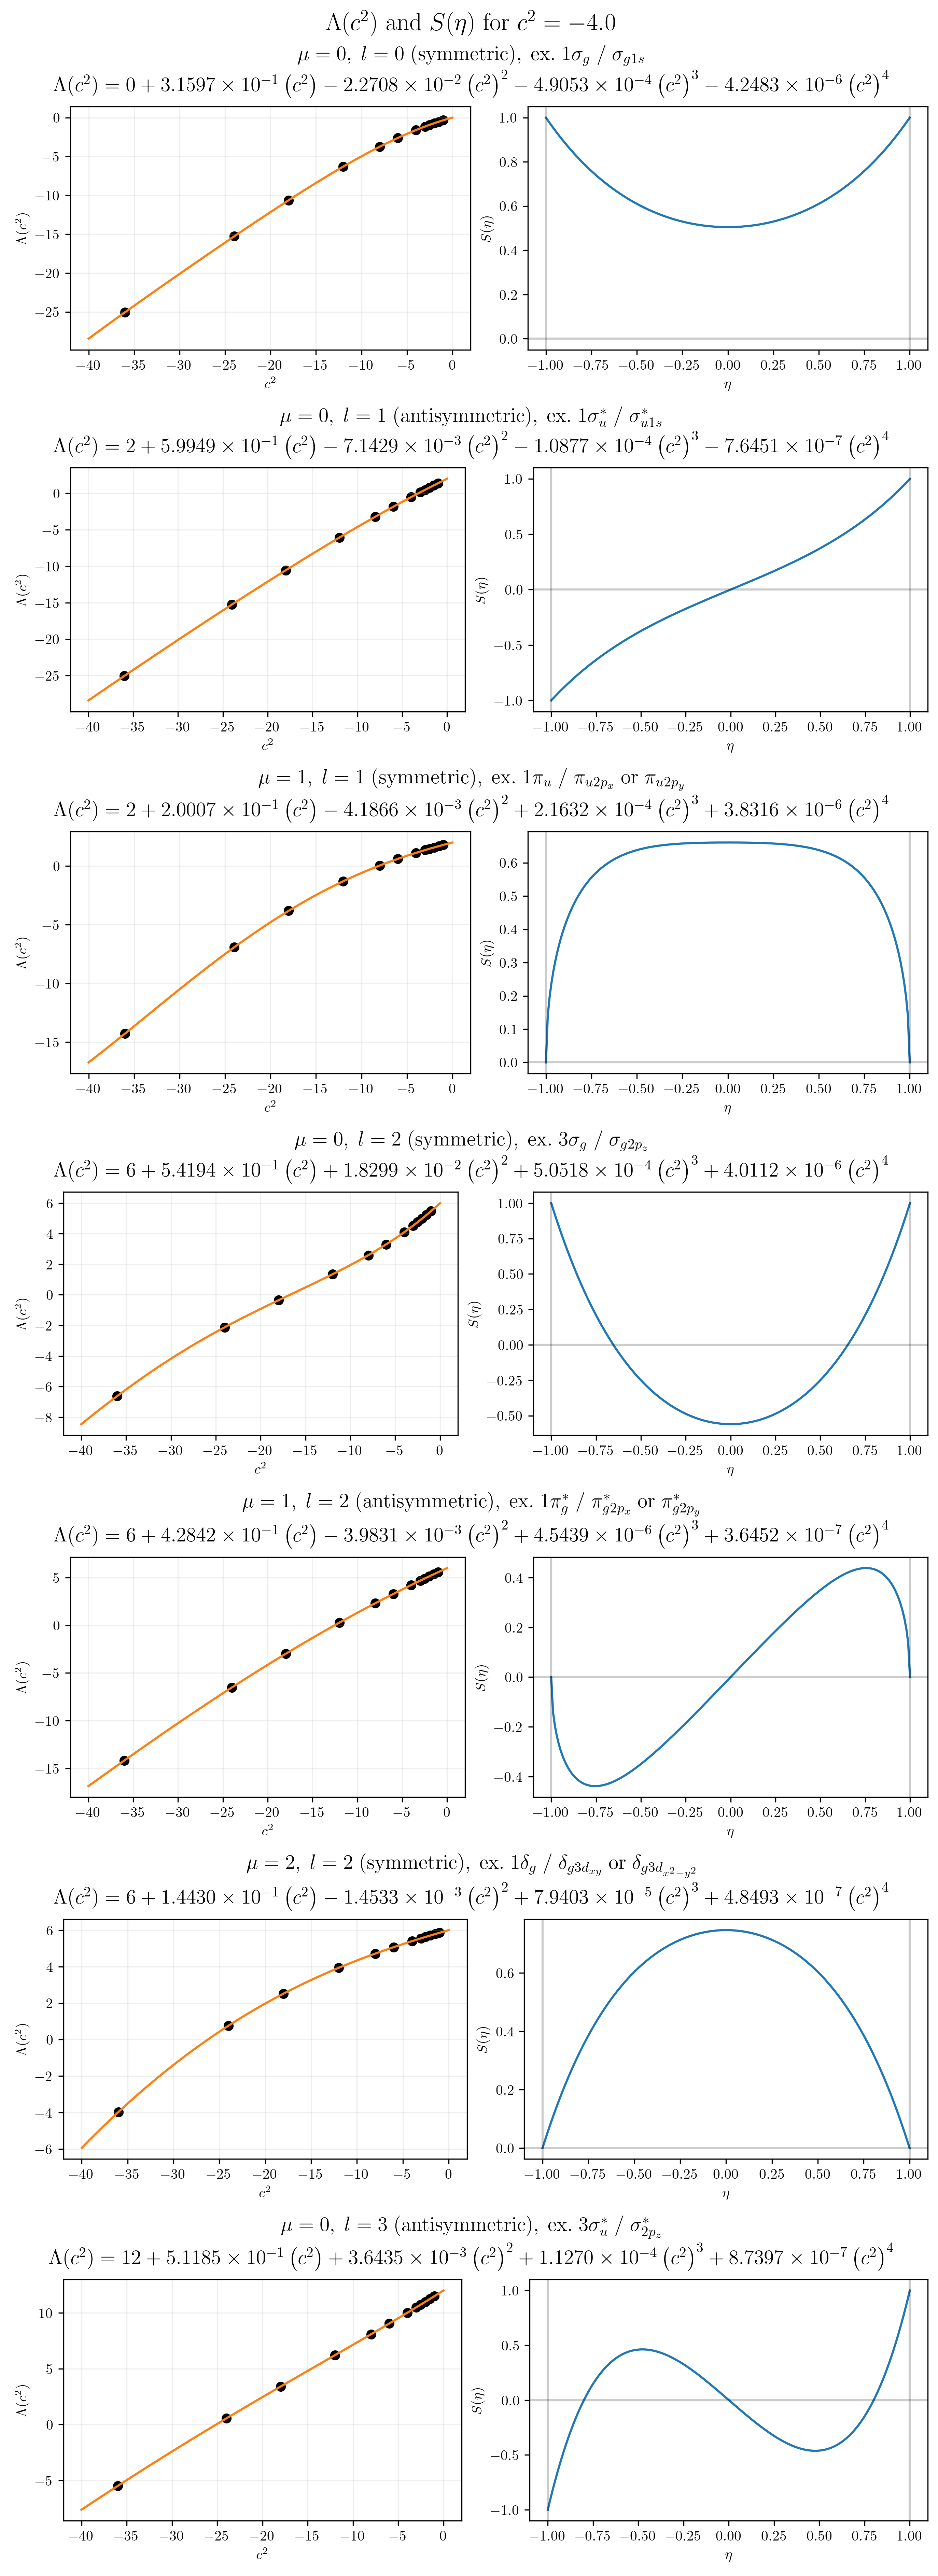

In [12]:
# note: for larger values of mu and l, an appropriate lbda_guess_func should be used
# for accurate results
mu_l = ((0, 0), (0, 1), (1, 1), (0, 2), (1, 2), (2, 2), (0, 3))

def poly_pretty_print(poly):
    """Takes a numpy polynomial and returns string in LaTeX for matplotlib"""
    str_list = []
    for ind, coef in enumerate(poly.coef):
        if ind == 0:
            coef_str = f'{int(coef)}'
        else:
            sign = '+' if coef >= 0.0 else ''
            coef_str = str(f'{coef:.4e}')
            mant, epnt = coef_str.split('e')
            epnt = int(epnt)
            if ind == 1:
                coef_str = (f'{sign}{mant} \\times ' 
                            f'10^{{{epnt}}} \\left ( c^2 \\right )')
            else:
                coef_str = (f'{sign}{mant} \\times '
                            f'10^{{{epnt}}} \\left ( c^2 \\right )^{ind}')

        str_list.append(coef_str)
    str_combined = ' '.join(str_list)
    
    return r' $\Lambda(c^2) =' + str_combined + '$'

fig = plt.figure(constrained_layout=True, figsize=(9, 25))
plt.tight_layout()
plt.suptitle(r"$\Lambda(c^2)$ and $S(\eta)$ for $c^2 = -4.0$", size='xx-large')
subfigs = fig.subfigures(7, 1)

ex_mo = [r"1\sigma_{g} \; / \; \sigma_{g1s}", 
         r"1\sigma_{u}^{*} \; / \; \sigma_{u1s}^{*}",
         r"1\pi_{u} \; / \; \pi_{u2p_{x}} \; \mathrm{or} \; \pi_{u2p_{y}}", 
         r"3\sigma_{g} \; / \; \sigma_{g2p_{z}}", 
         (r"1\pi_{g}^{*} \; / \; \pi_{g2p_{x}}^{*} "
          "\; \mathrm{or} \; \pi_{g2p_{y}}^{*}"), 
         (r"1\delta_{g} \; / \; \delta_{g3d_{xy}} "
          "\; \mathrm{or} \; \delta_{g3d_{x^2-y^2}}"),
         r"3\sigma_{u}^{*} \; / \; \sigma_{2p_{z}}^{*}"]

c2s = np.array((-1, -1.5, -2, -2.5, -3, -4, -6, -8, -12, -18, -24, -36))
c2_span = np.linspace(-40.0, 0, 50)

for ind, (mu, l) in enumerate(mu_l):
    is_even = True if (l - mu) % 2 == 0 else False
    
    lbda_vals, lbda_func = lbda_generator(mu, l)
    # calculate and plot S(eta) when c2 = -4
    eta_span, S_eta = calculate_S_eta(mu, l, -4.0, lbda_func)
    
    axes = subfigs[ind].subplots(1, 2)
    
    symmetry_string = 'symmetric' if is_even else 'antisymmetric'
    title_top = (f"$\\mu={mu}, \;  l={l} \;  (\\mathrm{{{symmetry_string}}}),"
                 f" \;  \\mathrm{{ex.}} \;  {ex_mo[ind]}$ ")
    subfigs[ind].suptitle('\n'.join([title_top, 
                                     poly_pretty_print(lbda_func)]), 
                          size='x-large')
    
    axes[0].scatter(c2s, lbda_vals, color='k')
    axes[0].plot(c2_span, lbda_func(c2_span), color='C1')
    axes[0].set_xlabel(r'$c^2$')
    axes[0].set_ylabel(r'$\Lambda(c^2)$')
    axes[0].grid(alpha=0.2)
    
    
    axes[1].plot(eta_span, S_eta, color='C0')
    axes[1].axhline(y=0.0, color='k', alpha=0.2)
    axes[1].axvline(x=-1.0, color='k', alpha=0.2)
    axes[1].axvline(x=1.0, color='k', alpha=0.2)
    axes[1].set_xlabel(r'$\eta$')
    axes[1].set_ylabel(r'$S(\eta)$')
    
    # uncomment the line below to save polynomials 
    # into a txt file with maximum precision
    """
    import os
    filename = f"lbda_{l}{mu}.txt"
    filedir = os.path.join(os.path.abspath(''), 
                           'data',
                           'lbda',
                           filename)
    with open(filedir, 'w') as file:
        np.savetxt(file, lbda_func.coef, fmt='%.100g')
    """